In [259]:
import optuna
import warnings
import gc
import os
import random
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from datetime import datetime
from glob import glob
from tqdm import tqdm
from IPython.display import Image

In [260]:
warnings.filterwarnings(action = 'ignore')

In [261]:

train_2018 = []


train_2018 = pd.read_csv('/Users/home/Downloads/KNOW_data/train/KNOW_2018.csv')


test_2018 = []

test_2018 = pd.read_csv('/Users/home/Downloads/KNOW_data/test/KNOW_2018_test.csv')




In [262]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

In [263]:
# 결측치 값 확인을 편하게 하기 위해서 모두 np.nan 값으로 변형해 준다.
# test_2018에 있는 모든 columns들을 불러온다.
for col in test_2018:
    
    # idx 값에는 별도의 결측치 값이 존재하지 않기 때문에 건너뛴다.
    if col == 'idx':
        continue
        
    train_2018.replace(' ', np.nan, inplace = True)
    test_2018.replace(' ', np.nan, inplace = True)

In [264]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

* 해당 부분을 보았을때 결측치 부분을 기준으로 보아 몇가지 열들을 불러왔을때 열들이 한칸씩 앞으로 온 것을 눈으로 확인이 가능하다.
* 밀려서 나온 값들중 가장 눈에 띄는 값인 나이를 이용하여 밀린 행들을 찾아낸다 bq35번은 성별을 질문을 하는 것인데 나이(bq36)를 표현하고 있다. 이 부분을 통해 밑의 자료와 같이 밀린부분을 확인할 수 있다.

In [265]:
display(train_2018.loc[(train_2018['bq4'].isnull()), ['bq1','bq2','bq3','bq4','bq4_1a', 'bq4_1b', 'bq4_1c','bq5', 'bq5_1', 'bq5_2','bq35']])
display(test_2018.loc[(test_2018['bq4'].isnull()), ['bq1','bq2','bq3','bq4','bq4_1a', 'bq4_1b', 'bq4_1c','bq5', 'bq5_1', 'bq5_2','bq35']])

,bq1,bq2,bq3,bq4,bq4_1a,bq4_1b,bq4_1c,bq5,bq5_1,bq5_2,bq35
1253,1.0,3.0,2.0,NaN,NaN,NaN,1,2,직무관련 실습,3,40
1628,1.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,5,53
2938,2.0,6.0,2.0,NaN,NaN,NaN,1,2,"직무교육, 현장안전교육, 도구사용법",4,26
3505,1.0,5.0,2.0,NaN,NaN,NaN,2,NaN,NaN,3,52
4478,2.0,6.0,2.0,NaN,NaN,NaN,1,3,"기본지식,실무 훈련",6,32
4718,1.0,3.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,26
4884,1.0,3.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,42
5292,1.0,5.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,35
5433,1.0,3.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,46
6512,1.0,3.0,2.0,NaN,NaN,NaN,1,2,프로그램 툴사용.제품구조 이해,5,27


,bq1,bq2,bq3,bq4,bq4_1a,bq4_1b,bq4_1c,bq5,bq5_1,bq5_2,bq35
86,1.0,5.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,48
87,1.0,2.0,2.0,NaN,NaN,NaN,1,3,현장기기조작 교육,4,53
663,1.0,5.0,2.0,NaN,NaN,NaN,1,3,직무 관련 교육,2,53
1171,1.0,5.0,2.0,NaN,NaN,NaN,1,2,현장에서 배우는 기술들,6,38
1423,1.0,2.0,2.0,NaN,NaN,NaN,1,2,품질혁신. 생산 계획수립,4,35
2050,1.0,5.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,46
2761,2.0,6.0,2.0,NaN,NaN,NaN,2,NaN,NaN,6,53
3141,1.0,6.0,2.0,NaN,NaN,NaN,2,NaN,NaN,2,48
3221,2.0,6.0,2.0,NaN,NaN,NaN,1,3,고속차량 유지보수 교육(전자장비),7,29
4756,2.0,6.0,2.0,NaN,NaN,NaN,1,1,설비 유지보수 훈련,7,30


In [266]:
train_2018['bq35'].dtype

dtype('O')

In [267]:
display(train_2018['bq35'].unique())
display(test_2018['bq35'].unique())
display(train_2018['bq34'].unique())

array([1.0, 2.0, 27.0, 40.0, 31.0, 53.0, 39.0, 26.0, 32.0, 52.0, 50.0,
       42.0, 35.0, 46.0, 37.0, 25.0, 44.0, 47.0, 56.0, '1', '2',
       ' 라이트룸 등의 컴퓨터 프로그램"', '42', '33', '45', '38', '30'], dtype=object)

array(['2', '1', '48', '53', '39', '50', '38', '35', '46', '29', '52',
       '문예창작', 1.0, 2.0, 40.0, 30.0, 49.0, 69.0, 31.0, 38.0, 39.0, 28.0,
       54.0, 41.0, 26.0, 50.0, 44.0, 51.0], dtype=object)

array([3.0, 4.0, 2.0, 1.0, 5.0, '3', '4', '2', '자동차과', '5', '1', ' 포토샵'],
      dtype=object)

In [268]:
display(train_2018[(train_2018['bq35'] == ' 라이트룸 등의 컴퓨터 프로그램"')])
display(test_2018[(test_2018['bq35'] == "문예창작")])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
8551,18048,5,4,3,3,1,5,2,2,1,...,색채심리상담사,3,1,48,5,지식재산학,1,1,NaN,415404


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3
3982,13474,5,4,5,5,5,5,5,5,5,...,NaN,6,NaN,70,NaN,NaN,4800.0,NaN,NaN,NaN


* 아래 이미지를 보면 위의 글자들 부분에서 문제가 생긴 것을 확인 할 수 있다. 이부분을 제외하고 다른 부분 먼저 실행을 해본다.
* train과 다르게 test의 글자 부분은 문제 없이 2칸씩 밀린것으로 확인이 가능하니 이부분을 밀도록 해본다.

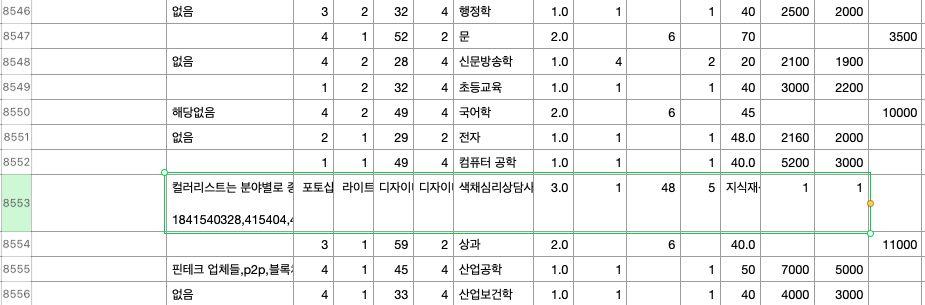

In [269]:
Image("/Users/home/Desktop/2018/train_error.png")

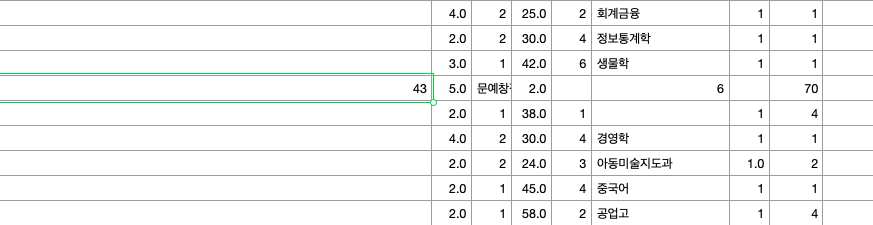

In [270]:
Image("/Users/home/Desktop/2018/test_error.png")

In [271]:
test_2018.iloc[:,120:140][(test_2018['bq35'] == "문예창작")]

,bq28,bq28_1,bq29,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3
3982,1,"프리랜서 직군이라는 시스템과 근로라는 부분이 부딪친다. 근로자인가 아닌가, 작가라는...","강의 등 겸직 및 전직 가능""","스토리텔링과 관련된 업체, 강연, 강의, 연설문 담당자, 교육자.",2,2,43,5.0,문예창작,2.0,NaN,6,NaN,70,NaN,NaN,4800.0,NaN,NaN,NaN


In [272]:
test_2018.iloc[3982:3983,67:140] = test_2018.iloc[3982:3983,67:140].shift(periods=2,axis=1)
display(train_2018['bq35'].unique())
display(test_2018['bq35'].unique())

array([1.0, 2.0, 27.0, 40.0, 31.0, 53.0, 39.0, 26.0, 32.0, 52.0, 50.0,
       42.0, 35.0, 46.0, 37.0, 25.0, 44.0, 47.0, 56.0, '1', '2',
       ' 라이트룸 등의 컴퓨터 프로그램"', '42', '33', '45', '38', '30'], dtype=object)

array(['2', '1', '48', '53', '39', '50', '38', '35', '46', '29', '52',
       1.0, 2.0, 40.0, 30.0, 49.0, 69.0, 31.0, 38.0, 39.0, 28.0, 54.0,
       41.0, 26.0, 50.0, 44.0, 51.0], dtype=object)

In [273]:
test_2018['bq35'] = test_2018['bq35'].astype(int)

In [274]:
for index in (train_2018[(train_2018['bq35'] != '1') & (train_2018['bq35'] != '2') & (train_2018['bq35'] != 1.0) & (train_2018['bq35'] != 2.0) & (train_2018['bq35'] != ' 라이트룸 등의 컴퓨터 프로그램"')]).index:
    train_2018.iloc[index:index+1,67:140] = train_2018.iloc[index:index+1,67:140].shift(periods=1,axis=1)
    
for index in (test_2018[(test_2018['bq35'] != '1') & (test_2018['bq35'] != '2') & (test_2018['bq35'] != 1.0) & (test_2018['bq35'] != 2.0) & (test_2018['bq35'] != '문예창작')]).index:
    test_2018.iloc[index:index+1,67:140] = test_2018.iloc[index:index+1,67:140].shift(periods=1,axis=1)

In [275]:
display(train_2018['bq35'].unique())
display(test_2018['bq35'].unique())

array([1.0, 2.0, '1', '2', ' 라이트룸 등의 컴퓨터 프로그램"'], dtype=object)

array([ 2.,  1., nan])

* 이젠 위의 한글 부분만 수정을 하면 미뤄진 부분은 해결이 가능할 것 같습니다.
* 32번부터 37번까지 바꿔야겠습니다.
* 그리고 38번부터 7칸이 밀려있는것을 확인가능한데 이부분을 이동해주도록 하겠습니다


In [276]:
train_2018.iloc[8551:8552,126:132] = np.nan
train_2018.iloc[8551:8552,125:133]


,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38
8551,없음,NaN,NaN,NaN,NaN,NaN,NaN,3


In [277]:
train_2018.iloc[8551:8552,127:134]

,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1
8551,NaN,NaN,NaN,NaN,NaN,3,1


In [278]:
train_2018.iloc[8551:8552,127:134] = train_2018.iloc[8551:8552,127:139].shift(periods=-5,axis=1)
train_2018.iloc[8551:8552,134:139]

,bq38_2,bq39,bq40,bq41_1,bq41_2
8551,48,5,지식재산학,1,1


In [279]:
train_2018.iloc[8551:8552,134:139] = np.nan
train_2018.iloc[8551:8552,134:139]

,bq38_2,bq39,bq40,bq41_1,bq41_2
8551,NaN,NaN,NaN,NaN,NaN


In [280]:
train_2018.iloc[8551:8552,126:132] = train_2018.iloc[index:index+1,133:140].shift(periods=-5,axis=1)

In [281]:
display(train_2018['bq35'].unique())
display(test_2018['bq35'].unique())

array([1.0, 2.0, '1', '2', nan], dtype=object)

array([ 2.,  1., nan])

* 해당부분은 4칸씩 밀려있으므로 밀어주도록하자

In [282]:
display(train_2018[(train_2018['bq34'] == '자동차과')])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
8205,17700,1,1,5,1,5,3,3,3,3,...,NaN,40,NaN,NaN,3600,NaN,NaN,NaN,NaN,622304


In [283]:
train_2018.iloc[8205:8206,127:140] = train_2018.iloc[8205:8206,123:136].shift(periods=4,axis=1)

In [284]:
display(train_2018.iloc[8205:8206,127:140])
display(train_2018.iloc[8205:8206,123:136])

,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3
8205,4,1,33,3,자동차과,2,NaN,6,NaN,NaN,NaN,NaN,NaN


,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39
8205,4,1,33,3,4,1,33,3,자동차과,2,NaN,6,NaN


In [285]:
train_2018.iloc[8205:8206,123:127] = np.nan
train_2018.iloc[8205:8206,123:128]

,bq30,bq31,bq32,bq33,bq34
8205,NaN,NaN,NaN,NaN,4


* bq4번의 결측치 제거

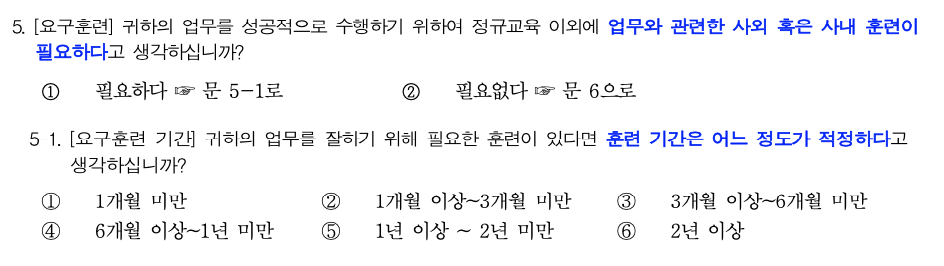

In [286]:
Image('/Users/home/Desktop/2018/bq5.png')

In [287]:
display(train_2018.loc[(train_2018['bq4'].isnull()), ['bq4','bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018.loc[(test_2018['bq4'].isnull()), ['bq4','bq4_1a', 'bq4_1b', 'bq4_1c']])

,bq4,bq4_1a,bq4_1b,bq4_1c
456,NaN,전기기사,NaN,NaN
1253,NaN,NaN,NaN,NaN
1548,NaN,금속재료시험 기능사,NaN,NaN
1628,NaN,NaN,NaN,NaN
1946,NaN,전기철도기사,전기기사,전기공사기사
2938,NaN,NaN,NaN,NaN
3064,NaN,2,NaN,NaN
3505,NaN,NaN,NaN,NaN
4000,NaN,제강기능사,지게차,NaN
4076,NaN,제강기능사,지게차자격증,NaN


,bq4,bq4_1a,bq4_1b,bq4_1c
86,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN
357,NaN,전기기사,NaN,NaN
381,NaN,전기기사,NaN,NaN
663,NaN,NaN,NaN,NaN
805,NaN,전기기사,NaN,NaN
1171,NaN,NaN,NaN,NaN
1289,NaN,전기관련,NaN,NaN
1423,NaN,NaN,NaN,NaN
2050,NaN,NaN,NaN,NaN


* 그리고 해당이미지를 볼때 4_1a이 결측치가 아닐때 4번은 1이고 결측치일때는 2가 나와야한다.

In [288]:
if '1' in list(train_2018['bq4_1a'].unique()):
    print("1이 bq4_1a에 존재한다.")

if '2' in list(train_2018['bq4_1a'].unique()):
    print("2가 bq4_1a에 존재한다.")    
    
if '1' in list(train_2018['bq4_1b'].unique()):
    print("1이 bq4_1b에 존재한다.")

if '2' in list(train_2018['bq4_1b'].unique()):
    print("2가 bq4_1b에 존재한다.")            
    
if '1' in list(test_2018['bq4_1a'].unique()):
    print("1이 bq4_1a에 존재한다.")

if '2' in list(test_2018['bq4_1a'].unique()):
    print("2가 bq4_1a에 존재한다.")    
    
if '1' in list(train_2018['bq4_1b'].unique()):
    print("1이 bq4_1b에 존재한다.")

if '2' in list(train_2018['bq4_1b'].unique()):
    print("2가 bq4_1b에 존재한다.")            

1이 bq4_1a에 존재한다.
2가 bq4_1a에 존재한다.
1이 bq4_1a에 존재한다.


* 위의 상황을 볼떄 train test 각각 2,3개씩 잘못 옮겨진것을 볼 수 있다. train의 3064는 16번부터 6685는 33번부터 잘못 옮겨져있다. 
* test의 3982는 31번부터 4940와 6396은 33번부터 잘못 옮겨져있다.

In [289]:
train_2018.iloc[3064:3065,67:90] = train_2018.iloc[3064:3065,67:90].shift(periods=-1,axis=1)
train_2018.iloc[6685:6686,67:126] = train_2018.iloc[6685:6686,67:126].shift(periods=-1,axis=1)
test_2018.iloc[3982:3983,68:124] = test_2018.iloc[3982:3983,68:124].shift(periods=-2,axis=1)
test_2018.iloc[4938:4939,68:126] = test_2018.iloc[4938:4939,68:126].shift(periods=-1,axis=1)
test_2018.iloc[6396:6397,68:126] = test_2018.iloc[6396:6397,68:126].shift(periods=-1,axis=1)

In [290]:
if '1' in list(train_2018['bq4_1a'].unique()):
    print("1이 bq4_1a에 존재한다.")

if '2' in list(train_2018['bq4_1a'].unique()):
    print("2가 bq4_1a에 존재한다.")    
    
if '1' in list(train_2018['bq4_1b'].unique()):
    print("1이 bq4_1b에 존재한다.")

if '2' in list(train_2018['bq4_1b'].unique()):
    print("2가 bq4_1b에 존재한다.")            
    
if '1' in list(test_2018['bq4_1a'].unique()):
    print("1이 bq4_1a에 존재한다.")

if '2' in list(test_2018['bq4_1a'].unique()):
    print("2가 bq4_1a에 존재한다.")    
    
if '1' in list(train_2018['bq4_1b'].unique()):
    print("1이 bq4_1b에 존재한다.")

if '2' in list(train_2018['bq4_1b'].unique()):
    print("2가 bq4_1b에 존재한다.")            

In [291]:
display(train_2018.loc[(train_2018['bq4'].isnull()), ['bq4','bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018.loc[(test_2018['bq4'].isnull()), ['bq4','bq4_1a', 'bq4_1b', 'bq4_1c']])

,bq4,bq4_1a,bq4_1b,bq4_1c
456,NaN,전기기사,NaN,NaN
1253,NaN,NaN,NaN,NaN
1548,NaN,금속재료시험 기능사,NaN,NaN
1628,NaN,NaN,NaN,NaN
1946,NaN,전기철도기사,전기기사,전기공사기사
2938,NaN,NaN,NaN,NaN
3505,NaN,NaN,NaN,NaN
4000,NaN,제강기능사,지게차,NaN
4076,NaN,제강기능사,지게차자격증,NaN
4254,NaN,전기기사,NaN,NaN


,bq4,bq4_1a,bq4_1b,bq4_1c
86,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN
357,NaN,전기기사,NaN,NaN
381,NaN,전기기사,NaN,NaN
663,NaN,NaN,NaN,NaN
805,NaN,전기기사,NaN,NaN
1171,NaN,NaN,NaN,NaN
1289,NaN,전기관련,NaN,NaN
1423,NaN,NaN,NaN,NaN
2050,NaN,NaN,NaN,NaN


In [292]:
def modify_bq4(data):
    for index in data.loc[(data['bq4'].isnull(),['bq4'])].index:
        if (data.loc[index, ['bq4_1a']].isnull()[0]):
            data.loc[index, 'bq4'] = '2'
        else:
            data.loc[index, 'bq4'] = '1'
            

modify_bq4(train_2018)            
modify_bq4(test_2018)

In [293]:
display(train_2018.loc[(train_2018['bq4'].isnull(),['bq4'])].index)

Int64Index([], dtype='int64')

In [294]:
for col in ['bq4_1a', 'bq4_1b', 'bq4_1c']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)

In [295]:
display(train_2018.loc[:, ['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])
display(test_2018.loc[:, ['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c']])

,bq4,bq4_1a,bq4_1b,bq4_1c
0,1,치과기공사,없음,없음
1,1,정보처리기사,없음,없음
2,2,없음,없음,없음
3,1,화학분석기능사,없음,없음
4,1,치과기능사,없음,없음
...,...,...,...,...
9067,1,한약사면허증,없음,없음
9068,2,없음,없음,없음
9069,1,의사면허증,안과전문의,없음
9070,1,의사면허증,전문의자격증,없음


,bq4,bq4_1a,bq4_1b,bq4_1c
0,2,없음,없음,없음
1,2,없음,없음,없음
2,2,없음,없음,없음
3,2,없음,없음,없음
4,1,속기사,없음,없음
...,...,...,...,...
9064,1,양식조리사,한식조리사,없음
9065,1,식품제조가공기사,식품기술사,위생사
9066,2,없음,없음,없음
9067,1,식품산업기사,없음,없음


* 결측치는 없음으로 바꾸고 나머지는 정상적으로 바꿔진 것을 확인이 가능해졌습니다.

### 1.4 bq5에 대한 결측치 처리 방법

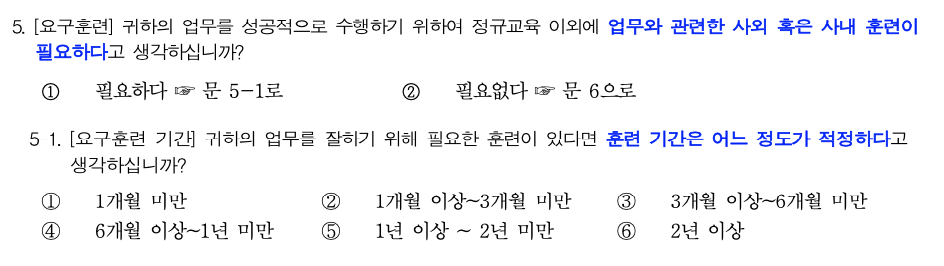

In [296]:
Image('/Users/home/Desktop/2018/bq5.png')

In [297]:
display(train_2018[(train_2018['bq5_1'].isnull())][['bq5', 'bq5_1', 'bq5_2']])
display(test_2018[(test_2018['bq5_1'].isnull())][['bq5', 'bq5_1', 'bq5_2']])

,bq5,bq5_1,bq5_2
2,2,NaN,NaN
3,2,NaN,NaN
4,2,NaN,NaN
6,2,NaN,NaN
11,2,NaN,NaN
...,...,...,...
9061,2,NaN,NaN
9062,2,NaN,NaN
9065,2,NaN,NaN
9068,2,NaN,NaN


,bq5,bq5_1,bq5_2
0,2,NaN,NaN
2,2,NaN,NaN
3,2,NaN,NaN
5,2,NaN,NaN
7,2,NaN,NaN
...,...,...,...
9049,2,NaN,NaN
9052,2,NaN,NaN
9056,2,NaN,NaN
9057,2,NaN,NaN


In [298]:
train_2018[(train_2018['bq5'] == 1)]

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


* 1번 값을 가진 행은 없다는 것을 확인 가능하다 나머지는 2번으로 넘어갔다고 생각을 하자
* 5_1은 숫자를 의미함으로 해당 문제와 같이 다음문제로 넘어가는 것은 10번을 선택했다 생각하고 바꿔보자

In [299]:
for col in ['bq5_1', 'bq5_2']:
    train_2018[col].replace(np.nan, 10, inplace = True)
    test_2018[col].replace(np.nan, 10, inplace = True)

In [300]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

### 1.4 bq6에 대한 결측치 처리 방법

* 6번은 밀면서 생긴 공백으로 다음번호와 동일하게 하거나 평균으로 대체해보겠습니다.

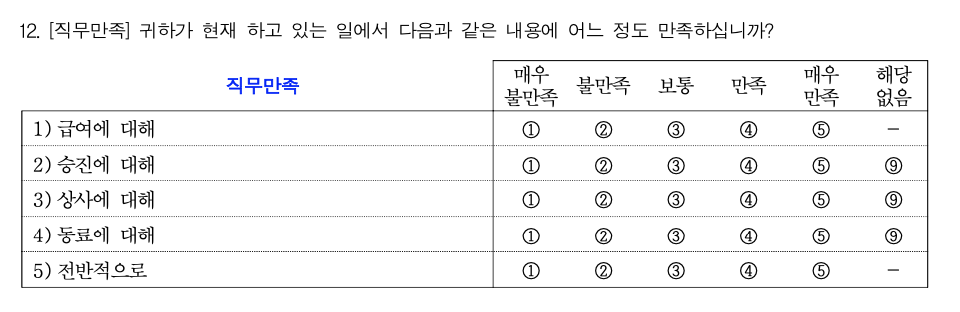

In [301]:
Image('/Users/home/Desktop/2018/bq12.png')

In [302]:
display(train_2018[(train_2018['bq6'].isnull())][['bq6']])
display(test_2018[(test_2018['bq6'].isnull())][['bq6']])

,bq6
456,NaN
1253,NaN
1548,NaN
1628,NaN
1946,NaN
2938,NaN
3505,NaN
4000,NaN
4076,NaN
4254,NaN


,bq6
86,NaN
87,NaN
357,NaN
381,NaN
663,NaN
805,NaN
1171,NaN
1289,NaN
1423,NaN
2050,NaN


In [303]:
for col in ['bq6']:
    train_2018[col].replace(np.nan, int(train_2018['bq6'].mean()), inplace = True)
    test_2018[col].replace(np.nan, int(train_2018['bq6'].mean()), inplace = True)

### bq7에 대한 결측치 처리

* test의 bq7은 3982는 2칸을 밀면서 생긴값으로 평균으로 대체해주겠습니다

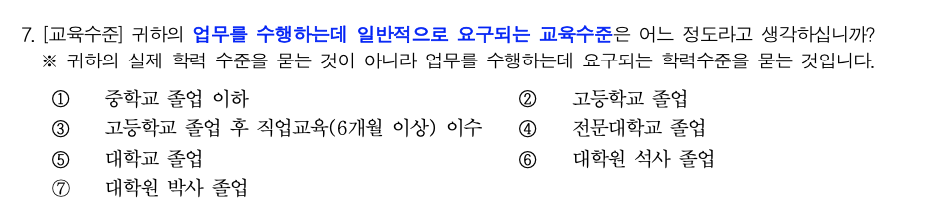

In [304]:
Image('/Users/home/Desktop/2018/bq7.png')

In [305]:
display(train_2018[(train_2018['bq7'].isnull())][['bq7']])
display(test_2018[(test_2018['bq7'].isnull())][['bq7']])

,bq7


,bq7
3982,NaN


In [306]:
for col in ['bq7']:
    test_2018[col].replace(np.nan, int(train_2018['bq7'].mean()), inplace = True)

### 1.5 bq12에 대한 결측치 처리 방법

* bq12_1 : 1 / bq12_1 : 0 / 1
* bq12_2 : 1174 / bq12_2 : 1134 / 2308
* bq12_3 : 1008 / bq12_3 : 1026 / 2034
* bq12_4 : 750 / bq12_4 : 711 / 1461
* bq12_5 : 0 / bq12_5 : 0 / 0

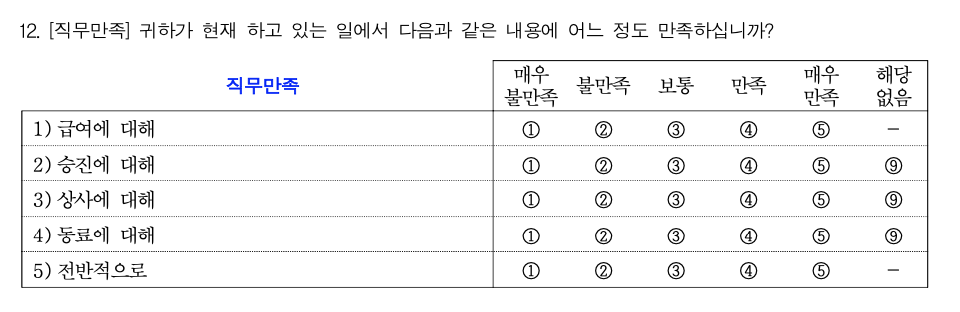

In [307]:
Image('/Users/home/Desktop/2018/bq12.png')

In [308]:
for col in ['bq12_1']:
    train_2018[col].replace(np.nan, 0, inplace = True)

### 1.5.1 bq12_2~bq12_4에 대한 결측치 처리

* 12번부터는 중간 몇개빼고 코드 공유한 부분을 가져와서 참고를 하겠습니다. 저 또한 학생이기에 이 부분에 대해서 자세히 알지 못해 진행을 하겠습니다.

위에 해당하는 결측치 값들은 아래의 질문 사항을 통해서 추가적으로 추측해보도록 하자.

1. [산업 유형] 귀하는 어떤 곳(산업)에 근무하고 계십니까?
2. [근무업체 유형] 귀하는 어떤 곳(업체)에 근무하고 계십니까?
3. [교육수준] 귀하의 업무를 수행하는데 일반적으로 요구되는 교육수준은 어느 정도라고 생각하십니까?
4. [사회적 평판] 귀하가 현재 수행하고 있는 일이 사회적으로 기여하고 타인의 인정을 받을 수 있다.
5. [사회적 평판] 귀하의 자녀가 귀하의 현재 직업과 동일한 직업을 원한다면 지지 하겠다.
6. [직업 안정성] 귀하의 현재 직업이 나이가 들어서도 계속 동일한 일을 할 수 있는 직업이라고 생각하십니까?
7. [근무조건] 귀하의 현재 업무는 업무환경이 쾌적하고 다른 여가를 즐길 수 있는 시간적 여유로움이 있다고
생각하십니까?
8. [발전가능성] 귀하가 현재 수행하고 있는 일을 통해 계속 자신의 전문성을 향상시킬 수 있으며 더 발전
할 수 있다고 생각하십니까?

In [309]:
display(train_2018[(train_2018['bq12_2'].isnull())]['bq12_2'])
display(test_2018[(test_2018['bq12_2'].isnull())]['bq12_2'])

1       NaN
4       NaN
5       NaN
11      NaN
14      NaN
       ... 
9061    NaN
9067    NaN
9068    NaN
9069    NaN
9070    NaN
Name: bq12_2, Length: 1174, dtype: object

2       NaN
3       NaN
6       NaN
19      NaN
28      NaN
       ... 
9031    NaN
9045    NaN
9050    NaN
9051    NaN
9057    NaN
Name: bq12_2, Length: 1134, dtype: object

In [310]:
train_indexs = train_2018[(train_2018['bq12_2'].isnull())].index
for index in train_2018[(train_2018['bq12_2'].isnull())].index:
    # 산업 유형
    industry_type = train_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = train_2018.loc[index, 'bq2']
    # 교육수준
    education_level = train_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = train_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = train_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = train_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = train_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = train_2018.loc[index, 'bq10']
    
    # 승진에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '교육수준', '직업 안정성', '근무조건'에서 기인한다고 추측 했습니다.
    # 교육수준이 높을 수록 좋은 회사에 들어갈 확률이 높습니다. 
    # 따라서, 좋은 회사일 수록 승진의 기회가 좁아지는 것은 올바른 추측이라고 생각합니다.
    # 사회적 평판과 승진과는 별다른 인과관계가 없다고 생각했기 때문에 이 또한 승진에 대한 추측에서 제외했습니다.
    if len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성', '근무조건'
        train_2018.loc[index, 'bq12_2'] = train_2018.loc[(train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security) & (train_2018['bq11'] == working_conditions), 'bq12_2'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성'
        train_2018.loc[index, 'bq12_2'] = train_2018.loc[(train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq9'] == job_security), 'bq12_2'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq9'] == job_security) & (train_2018['bq10'] == advancement)]) >= 1:
        # '직업 안정성', '발전 가능성'
        train_2018.loc[index, 'bq12_2'] = train_2018[(train_2018['bq9'] == job_security) & (train_2018['bq10'] == advancement)]['bq12_2'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_2'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '직업 안정성'
        train_2018.loc[index, 'bq12_2'] = train_2018[(train_2018['bq1'] == industry_type) & (train_2018['bq9'] == job_security)]['bq12_2'].value_counts().index[0]
    else:
        # 학습 데이터 상에서는 위에 조건에 다 만족한다.
        pass

In [311]:
test_indexs = test_2018[(test_2018['bq12_2'].isnull())].index
for index in test_2018[(test_2018['bq12_2'].isnull())].index:
    # 산업 유형
    industry_type = test_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = test_2018.loc[index, 'bq2']
    # 교육수준
    education_level = test_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = test_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = test_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = test_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = test_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = test_2018.loc[index, 'bq10']
    
    # 승진에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '교육수준', 직업 안정성', '근무조건'에서 기인한다고 추측 했습니다.
    # 교육수준이 높을 수록 좋은 회사에 들어갈 확률이 높습니다. 
    # 따라서, 좋은 회사일 수록 승진의 기회가 좁아지는 것은 올바른 추측이라고 생각합니다.
    # 사회적 평판과 승진과는 별다른 인과관계가 없다고 생각했기 때문에 이 또한 승진에 대한 추측에서 제외했습니다.
    if len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성', '근무조건'
        test_2018.loc[index, 'bq12_2'] = test_2018.loc[(test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security) & (test_2018['bq11'] == working_conditions), 'bq12_2'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '근무업체 유형', '직업 안정성'
        test_2018.loc[index, 'bq12_2'] = test_2018.loc[(test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq9'] == job_security), 'bq12_2'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq9'] == job_security) & (test_2018['bq10'] == advancement)]) >= 1:
        # '직업 안정성', '발전 가능성'
        test_2018.loc[index, 'bq12_2'] = test_2018[(test_2018['bq9'] == job_security) & (test_2018['bq10'] == advancement)]['bq12_2'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_2'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq9'] == job_security)]) >= 1:
        # '산업 유형', '직업 안정성'
        test_2018.loc[index, 'bq12_2'] = test_2018[(test_2018['bq1'] == industry_type) & (test_2018['bq9'] == job_security)]['bq12_2'].value_counts().index[0]
    else:
        # 테스트 데이터 상애서도 위를 다 만족한다.
        pass

    

In [312]:
display(train_2018.loc[train_indexs, 'bq12_2'])
display(test_2018.loc[test_indexs, 'bq12_2'])

1       3
4       3
5       3
11      3
14      3
       ..
9061    3
9067    4
9068    3
9069    4
9070    3
Name: bq12_2, Length: 1174, dtype: object

2       2
3       3
6       3
19      5
28      3
       ..
9031    4
9045    4
9050    3
9051    3
9057    3
Name: bq12_2, Length: 1134, dtype: object

In [313]:
display(train_2018[(train_2018['bq12_3'].isnull())]['bq12_3'])
display(test_2018[(test_2018['bq12_3'].isnull())]['bq12_3'])

11      NaN
15      NaN
26      NaN
28      NaN
31      NaN
       ... 
9061    NaN
9067    NaN
9068    NaN
9069    NaN
9070    NaN
Name: bq12_3, Length: 1008, dtype: object

2       NaN
3       NaN
6       NaN
19      NaN
37      NaN
       ... 
9031    NaN
9045    NaN
9050    NaN
9051    NaN
9057    NaN
Name: bq12_3, Length: 1026, dtype: object

In [314]:
train_indexs = train_2018[(train_2018['bq12_3'].isnull())].index
for index in train_2018[(train_2018['bq12_3'].isnull())].index:
    # 산업 유형
    industry_type = train_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = train_2018.loc[index, 'bq2']
    # 교육수준
    education_level = train_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = train_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = train_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = train_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = train_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = train_2018.loc[index, 'bq10']
    
    # 상사에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '근무조건' 에 크게 영향을 받는다고 생각한다.
    # 상사가 나쁜 회사일 수록 '귀하의 자녀가 귀하의 현재 직업과 동일한 작업을 원한다' 라는 질문에서 나쁘게 선택했을 가능성이 크다.
    # 부모 되는 입장에서 자식에게 나쁜 것을 물려주고 싶은 부모는 없다고 생각하기 때문이다.
    # 교육수준은 상사에 대한 평가에서는 제외하도록 하겠다. 
    # 교육수준이 높다고 해서 무조건 적으로 좋은 상사라고 생각하지 않는다. 
    # 나쁜 사람이 나쁜 것이지 그것이 교육 수준하고는 무관하기 때문이다. 
    
    # bq1, bq2, bq8_2, bq11
    if len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]['bq12_3'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_3'] = train_2018[(train_2018['bq12_3'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    else:
        # 학습 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [315]:
test_indexs = test_2018[(test_2018['bq12_3'].isnull())].index
for index in test_2018[(test_2018['bq12_3'].isnull())].index:
    # 산업 유형
    industry_type = test_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = test_2018.loc[index, 'bq2']
    # 교육수준
    education_level = test_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = test_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = test_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = test_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = test_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = test_2018.loc[index, 'bq10']
    
    # 상사에 대한 좋고 나쁨은 '산업 유형', '근무업체 유형', '근무조건' 에 크게 영향을 받는다고 생각한다.
    # 상사가 나쁜 회사일 수록 '귀하의 자녀가 귀하의 현재 직업과 동일한 작업을 원한다' 라는 질문에서 나쁘게 선택했을 가능성이 크다.
    # 부모 되는 입장에서 자식에게 나쁜 것을 물려주고 싶은 부모는 없다고 생각하기 때문이다.
    # 교육수준은 상사에 대한 평가에서는 제외하도록 하겠다. 
    # 교육수준이 높다고 해서 무조건 적으로 좋은 상사라고 생각하지 않는다. 
    # 나쁜 사람이 나쁜 것이지 그것이 교육 수준하고는 무관하기 때문이다. 
    
    # bq1, bq2, bq8_2, bq11
    if len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]['bq12_3'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_3'] = test_2018[(test_2018['bq12_3'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_3'].value_counts().index[0]
    else:
        # 테스트 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [316]:
display(train_2018.loc[train_indexs,'bq12_3'])
display(test_2018.loc[test_indexs,'bq12_3'])

11      4
15      4
26      4
28      3
31      3
       ..
9061    3
9067    4
9068    3
9069    3
9070    3
Name: bq12_3, Length: 1008, dtype: object

2       3
3       3
6       4
19      5
37      4
       ..
9031    4
9045    4
9050    3
9051    4
9057    4
Name: bq12_3, Length: 1026, dtype: object

In [317]:
display(train_2018[(train_2018['bq12_4'].isnull())]['bq12_4'])
display(test_2018[(test_2018['bq12_4'].isnull())]['bq12_4'])

2       NaN
11      NaN
15      NaN
23      NaN
31      NaN
       ... 
9036    NaN
9052    NaN
9061    NaN
9067    NaN
9068    NaN
Name: bq12_4, Length: 751, dtype: object

0       NaN
6       NaN
37      NaN
57      NaN
69      NaN
       ... 
8991    NaN
9022    NaN
9031    NaN
9050    NaN
9057    NaN
Name: bq12_4, Length: 711, dtype: object

In [318]:
train_indexs = train_2018[(train_2018['bq12_4'].isnull())].index
for index in train_2018[(train_2018['bq12_4'].isnull())].index:
    # 산업 유형
    industry_type = train_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = train_2018.loc[index, 'bq2']
    # 교육수준
    education_level = train_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = train_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = train_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = train_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = train_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = train_2018.loc[index, 'bq10']
    
    # 동료에 대한 좋고 나쁨은 위의 상사와 비슷하다고 생각한다.
    # 따라서 동일한 가정을 통해서 추측하도록 하겠다. 
        # bq1, bq2, bq8_2, bq11
    if len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2) & (train_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type) & (train_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq2'] == work_company_type)]['bq12_4'].value_counts().index[0]
    elif len(train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        train_2018.loc[index, 'bq12_4'] = train_2018[(train_2018['bq12_4'].notnull()) & (train_2018['bq1'] == industry_type) & (train_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    else:
        # 학습 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [319]:
test_indexs = test_2018[(test_2018['bq12_4'].isnull())].index
for index in test_2018[(test_2018['bq12_4'].isnull())].index:
    # 산업 유형
    industry_type = test_2018.loc[index, 'bq1']
    # 근무업체 유형
    work_company_type = test_2018.loc[index, 'bq2']
    # 교육수준
    education_level = test_2018.loc[index, 'bq7']
    # 사회적 평판_1
    social_reputation_1 = test_2018.loc[index, 'bq8_1']
    # 사회적 평판_2
    social_reputation_2 = test_2018.loc[index, 'bq8_2']
    # 직업 안정성
    job_security = test_2018.loc[index, 'bq9']
    # 근무조건
    working_conditions = test_2018.loc[index, 'bq11']
    # 발전가능성
    advancement  = test_2018.loc[index, 'bq10']
    
    # 동료에 대한 좋고 나쁨은 위의 상사와 비슷하다고 생각한다.
    # 따라서 동일한 가정을 통해서 추측하도록 하겠다. 
        # bq1, bq2, bq8_2, bq11
    if len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판', '근무조건'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2) & (test_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '근무업체 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]) >= 1:
        # '산업 유형', '근무업체 유형', '근무조건'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type) & (test_2018['bq11'] == working_conditions)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]) >= 1:
        #  '산업 유형', '근무업체 유형'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq2'] == work_company_type)]['bq12_4'].value_counts().index[0]
    elif len(test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]) >= 1:
        # '산업 유형', '사회적 평판'
        test_2018.loc[index, 'bq12_4'] = test_2018[(test_2018['bq12_4'].notnull()) & (test_2018['bq1'] == industry_type) & (test_2018['bq8_2'] == social_reputation_2)]['bq12_4'].value_counts().index[0]
    else:
        # 테스트 데이터에서는 위의 가정에 모두 속해있다.
        pass

In [320]:
display(train_2018.loc[train_indexs,'bq12_4'])
display(test_2018.loc[test_indexs,'bq12_4'])
print("bq12_4 결측치 수 : ",train_2018['bq12_4'].isnull().sum())
print("bq12_4 결측치 수 : ",test_2018['bq12_4'].isnull().sum())

2       4
11      4
15      4
23      3
31      3
       ..
9036    4
9052    4
9061    3
9067    4
9068    3
Name: bq12_4, Length: 751, dtype: object

0       4
6       4
37      4
57      4
69      5
       ..
8991    4
9022    4
9031    4
9050    4
9057    4
Name: bq12_4, Length: 711, dtype: object

bq12_4 결측치 수 :  0
bq12_4 결측치 수 :  0


### 1.4 bq15에 대한 결측치 처리 방법

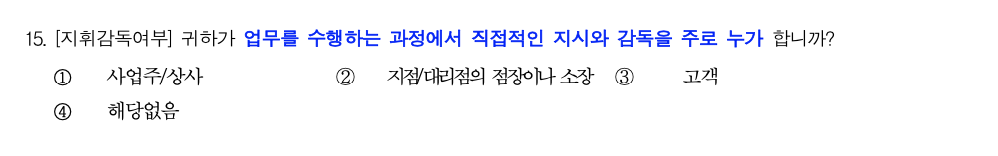

In [321]:
Image('/Users/home/Desktop/2018/bq15.png')

In [322]:
display(train_2018[(train_2018['bq15'].isnull())][['bq15']])
display(test_2018[(test_2018['bq15'].isnull())][['bq15']])

,bq15
3064,NaN


,bq15


* 3064번은 한칸씩 당길때 16번부터 문제가 있는게 확인이 되었었던 문제로 옮겨진 값으로 평균으로 대체하겠습니다.

In [323]:
for col in ['bq15']:
    train_2018[col].replace(np.nan, int(train_2018['bq15'].mean()), inplace = True)

### bq22에 대한 켤측치 처리

* bq221 : 1956 / bq221 : 2005 / 3961
* bq222 : 7797 / bq222 : 7783 / 15580
* bq223 : 2 / bq223 : 2 / 4

* 221 222 223의 1,2,3은 1,2,3을 선택한것 같습니다

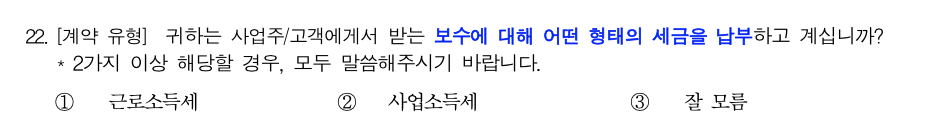

In [324]:
Image('/Users/home/Desktop/2018/bq22.png')

In [325]:
train_2018['bq221'] = train_2018['bq221'].astype(float)
print("bq221 데이터 값 : ", train_2018['bq221'].unique())
print(train_2018['bq221'].value_counts())

bq221 데이터 값 :  [ 1. nan  2.  3.]
1.0    7111
3.0      21
2.0      14
Name: bq221, dtype: int64


In [326]:
train_2018['bq222'] = train_2018['bq222'].astype(float)
print("bq222 데이터 값 : ", train_2018['bq222'].unique())
print(train_2018['bq222'].value_counts())

bq222 데이터 값 :  [nan  2.]
2.0    1244
Name: bq222, dtype: int64


In [327]:
train_2018['bq223'] = train_2018['bq223'].astype(float)
print("bq223 데이터 값 : ", train_2018['bq223'].unique())
print(train_2018['bq223'].value_counts())

bq223 데이터 값 :  [0. 3.]
0.0    8298
3.0     774
Name: bq223, dtype: int64


In [328]:
test_2018['bq221'] = test_2018['bq221'].astype(float)
print("bq221 데이터 값 : ", test_2018['bq221'].unique())
print(test_2018['bq221'].value_counts())

bq221 데이터 값 :  [nan  1.  3.  4.  2.  5.]
1.0    7032
3.0      30
2.0      17
4.0      14
5.0       1
Name: bq221, dtype: int64


In [329]:
test_2018['bq222'] = test_2018['bq222'].astype(float)
print("bq222 데이터 값 : ", test_2018['bq222'].unique())
print(test_2018['bq222'].value_counts())

bq222 데이터 값 :  [ 2. nan  3.  1.]
2.0    1253
3.0       2
1.0       1
Name: bq222, dtype: int64


In [330]:
test_2018['bq223'] = test_2018['bq223'].astype(float)
print("bq223 데이터 값 : ", test_2018['bq223'].unique())
print(test_2018['bq223'].value_counts())

bq223 데이터 값 :  [0. 3.]
0.0    8264
3.0     805
Name: bq223, dtype: int64


* 위의 서아래 코드의 조건을 간단하게 하기위해 float형태로 바꿔준후 중복으로 선택한 사람들을 골랐습니다.

In [331]:
display(train_2018.iloc[:,96:99][(train_2018['bq221'] == 1)&(train_2018['bq222'] == 2)&(train_2018['bq223'] == 3)])
display(train_2018.iloc[:,96:99][(train_2018['bq221'] == 1)&(train_2018['bq222'] == 2)])
display(train_2018.iloc[:,96:99][(train_2018['bq221'] == 1)&(train_2018['bq223'] == 3)])
display(train_2018.iloc[:,96:99][(train_2018['bq222'] == 2)&(train_2018['bq223'] == 3)])

,bq221,bq222,bq223


,bq221,bq222,bq223
36,1.0,2.0,0.0
37,1.0,2.0,0.0
256,1.0,2.0,0.0
778,1.0,2.0,0.0
789,1.0,2.0,0.0
...,...,...,...
8693,1.0,2.0,0.0
8696,1.0,2.0,0.0
8816,1.0,2.0,0.0
8851,1.0,2.0,0.0


,bq221,bq222,bq223
309,1.0,NaN,3.0
3897,1.0,NaN,3.0
5464,1.0,NaN,3.0
6655,1.0,NaN,3.0
7255,1.0,NaN,3.0
7362,1.0,NaN,3.0
8956,1.0,NaN,3.0


,bq221,bq222,bq223


* 이제부터 각 번호에 맞지 않는 다른 값들을 변경해주도록 하겠습니다.
* 그리고 3번을 선택했다는 것은 1or2번을 선택을 안했다고 할 수 있을것입니다.
* 아래 코드를 진행시 보았을떄 221에 2or3번이 있는 경우는 그 사람이 2or3번을 선택을 했을 수 있고 아님 데이터 입력시 1을 2or3으로 실수를 할 수 있고 그 사람이 답을 안했을 경우로 나누어 질 수 있습니다.
* 따라서 해당칸에 다른값들은 해당열에 맞게 미루거나 숫자를 바꾸거나 결측치로 바꿀 수 있습니다.

In [332]:
train_2018[(train_2018['bq223'] == 3)][['bq221', 'bq222', 'bq223']]

,bq221,bq222,bq223
22,NaN,NaN,3.0
23,NaN,NaN,3.0
31,NaN,NaN,3.0
54,NaN,NaN,3.0
66,NaN,NaN,3.0
...,...,...,...
8988,NaN,NaN,3.0
9002,NaN,NaN,3.0
9019,NaN,NaN,3.0
9030,NaN,NaN,3.0


In [333]:
# '3'을 제외한 모든 값은 결측치로 변경한다.
train_2018.loc[(train_2018['bq223'] != 3), 'bq223'] = 0
test_2018.loc[(test_2018['bq223'] != 3), 'bq223'] = 0

In [334]:

train_2018.loc[(train_2018['bq223'] == 3), 'bq221'] = 0
train_2018.loc[(train_2018['bq223'] == 3), 'bq222'] = 0

test_2018.loc[(test_2018['bq223'] == 3), 'bq221'] = 0
test_2018.loc[(test_2018['bq223'] == 3), 'bq222'] = 0

In [335]:
train_2018.loc[((train_2018['bq221'] != 0)&(train_2018['bq221'].notnull())), 'bq221'] = 1
test_2018.loc[((test_2018['bq221'] != 0)&(test_2018['bq221'].notnull())), 'bq221'] = 1
train_2018.loc[((train_2018['bq222'] != 0)&(train_2018['bq222'].notnull())), 'bq222'] = 2
test_2018.loc[((test_2018['bq222'] != 0)&(test_2018['bq222'].notnull())), 'bq222'] = 2

train_2018.loc[((train_2018['bq221'].isnull())), 'bq221'] = 0
test_2018.loc[((test_2018['bq221'].isnull())), 'bq221'] = 0
train_2018.loc[((train_2018['bq222'].isnull())), 'bq222'] = 0
test_2018.loc[((test_2018['bq222'].isnull())), 'bq222'] = 0

In [336]:
print("bq221 데이터 값 : ", train_2018['bq221'].unique())
print(train_2018['bq221'].value_counts())

bq221 데이터 값 :  [1. 0.]
1.0    7139
0.0    1933
Name: bq221, dtype: int64


In [337]:
print("bq222 데이터 값 : ", train_2018['bq222'].unique())
print(train_2018['bq222'].value_counts())

bq222 데이터 값 :  [0. 2.]
0.0    7828
2.0    1244
Name: bq222, dtype: int64


In [338]:
print("bq223 데이터 값 : ", train_2018['bq223'].unique())
print(train_2018['bq223'].value_counts())

bq223 데이터 값 :  [0. 3.]
0.0    8298
3.0     774
Name: bq223, dtype: int64


In [339]:
print("bq221 데이터 값 : ", test_2018['bq221'].unique())
print(test_2018['bq221'].value_counts())

bq221 데이터 값 :  [0. 1.]
1.0    7092
0.0    1977
Name: bq221, dtype: int64


In [340]:
print("bq222 데이터 값 : ", test_2018['bq222'].unique())
print(test_2018['bq222'].value_counts())

bq222 데이터 값 :  [2. 0.]
0.0    7814
2.0    1255
Name: bq222, dtype: int64


In [341]:
print("bq223 데이터 값 : ", test_2018['bq223'].unique())
print(test_2018['bq223'].value_counts())

bq223 데이터 값 :  [0. 3.]
0.0    8264
3.0     805
Name: bq223, dtype: int64


In [342]:
display((train_2018[(train_2018['bq221'].isnull())&(train_2018['bq222'].isnull())&(train_2018['bq223'].isnull())]).iloc[:,96:99])
display((test_2018[(test_2018['bq221'].isnull())&(test_2018['bq222'].isnull())&(test_2018['bq223'].isnull())]).iloc[:,96:99])

,bq221,bq222,bq223


,bq221,bq222,bq223


* 이렇게까지 진행을하여 1,2,3 전체가 결측치를 가진 값이 존재하지 않습니다. 그리고 나머지 결측치 들은 0으로 변경해주도록 하겠습니다.

In [343]:
for col in ['bq221','bq222','bq223']:
    test_2018[col].replace(np.nan, 0, inplace = True)
    test_2018[col].replace(np.nan, 0, inplace = True)

### bq23번의 결측치 처리

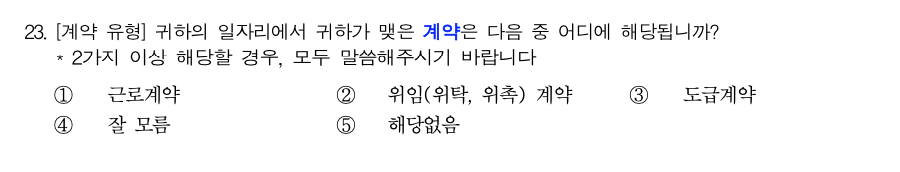

In [344]:
Image('/Users/home/Desktop/2018/bq23.png')

* 아래 코드를 정리할때 train에서 3,4,5에서는 문제가 없고 test에서는 4,5번이 문제가 없어 나머지 답들을 건들어 주었습니다.

In [345]:
train_2018['bq231'] = train_2018['bq231'].astype(float)
train_2018['bq232'] = train_2018['bq232'].astype(float)
train_2018['bq233'] = train_2018['bq233'].astype(float)
train_2018['bq234'] = train_2018['bq234'].astype(float)
train_2018['bq235'] = train_2018['bq235'].astype(float)

test_2018['bq231'] = test_2018['bq231'].astype(float)
test_2018['bq232'] = test_2018['bq232'].astype(float)
test_2018['bq233'] = test_2018['bq233'].astype(float)
test_2018['bq234'] = test_2018['bq234'].astype(float)
test_2018['bq235'] = test_2018['bq235'].astype(float)

display(train_2018['bq231'].value_counts())
display(train_2018['bq232'].value_counts())

display(test_2018['bq231'].value_counts())
display(test_2018['bq232'].value_counts())
display(test_2018['bq233'].value_counts())

1.0    6779
5.0      22
2.0      11
4.0       6
3.0       2
Name: bq231, dtype: int64

0.0      8830
2.0       202
100.0      13
90.0        6
3.0         6
80.0        5
85.0        3
70.0        3
4.0         2
60.0        1
20.0        1
Name: bq232, dtype: int64

1.0    6784
4.0      15
5.0      13
2.0      10
3.0       4
Name: bq231, dtype: int64

0.0    8812
2.0     222
1.0      28
4.0       4
3.0       3
Name: bq232, dtype: int64

0.0    8762
3.0     306
2.0       1
Name: bq233, dtype: int64

* 해당 데이터 또한 위와 같은 방식으로 볼 수 있을 것입니다.
* 23번은 4,5번을 선택한 경우 다른 번호는 선택하지 않았다고 확인 할 수 있습니다.

In [346]:
train_2018.loc[(train_2018['bq234'] != 4), 'bq234'] = 0
test_2018.loc[(test_2018['bq234'] != 4), 'bq234'] = 0

train_2018.loc[(train_2018['bq234'] == 4), 'bq231'] = 0
train_2018.loc[(train_2018['bq234'] == 4), 'bq232'] = 0
train_2018.loc[(train_2018['bq234'] == 4), 'bq233'] = 0

test_2018.loc[(test_2018['bq234'] == 4), 'bq231'] = 0
test_2018.loc[(test_2018['bq234'] == 4), 'bq232'] = 0
test_2018.loc[(test_2018['bq234'] == 4), 'bq233'] = 0

train_2018.loc[(train_2018['bq235'] != 5), 'bq235'] = 0
test_2018.loc[(test_2018['bq235'] != 5), 'bq235'] = 0

train_2018.loc[(train_2018['bq235'] == 5), 'bq231'] = 0
train_2018.loc[(train_2018['bq235'] == 5), 'bq232'] = 0
train_2018.loc[(train_2018['bq235'] == 5), 'bq233'] = 0

test_2018.loc[(test_2018['bq235'] == 5), 'bq231'] = 0
test_2018.loc[(test_2018['bq235'] == 5), 'bq232'] = 0
test_2018.loc[(test_2018['bq235'] == 5), 'bq233'] = 0

In [347]:
train_2018.loc[((train_2018['bq231'] != 0)&(train_2018['bq231'].notnull())), 'bq231'] = 1
test_2018.loc[((test_2018['bq231'] != 0)&(test_2018['bq231'].notnull())), 'bq231'] = 1


train_2018.loc[((train_2018['bq232'] != 0)&(train_2018['bq232'].notnull())), 'bq232'] = 2
test_2018.loc[((test_2018['bq232'] != 0)&(test_2018['bq232'].notnull())), 'bq232'] = 2

train_2018.loc[((train_2018['bq233'] != 0)&(train_2018['bq233'].notnull())), 'bq233'] = 3
test_2018.loc[((test_2018['bq233'] != 0)&(test_2018['bq233'].notnull())), 'bq233'] = 3


train_2018.loc[((train_2018['bq231'].isnull())), 'bq231'] = 0
test_2018.loc[((test_2018['bq231'].isnull())), 'bq231'] = 0
train_2018.loc[((train_2018['bq232'].isnull())), 'bq232'] = 0
test_2018.loc[((test_2018['bq232'].isnull())), 'bq232'] = 0
train_2018.loc[((train_2018['bq233'].isnull())), 'bq232'] = 0
test_2018.loc[((test_2018['bq233'].isnull())), 'bq233'] = 0


In [348]:
display(train_2018['bq231'].value_counts())
display(train_2018['bq232'].value_counts())
display(train_2018['bq233'].value_counts())
display(train_2018['bq234'].value_counts())
display(train_2018['bq235'].value_counts())

display(test_2018['bq231'].value_counts())
display(test_2018['bq232'].value_counts())
display(test_2018['bq233'].value_counts())
display(test_2018['bq234'].value_counts())
display(test_2018['bq235'].value_counts())

1.0    6814
0.0    2258
Name: bq231, dtype: int64

0.0    8834
2.0     238
Name: bq232, dtype: int64

0.0    8777
3.0     295
Name: bq233, dtype: int64

0.0    8554
4.0     518
Name: bq234, dtype: int64

0.0    7758
5.0    1314
Name: bq235, dtype: int64

1.0    6821
0.0    2248
Name: bq231, dtype: int64

0.0    8812
2.0     257
Name: bq232, dtype: int64

0.0    8762
3.0     307
Name: bq233, dtype: int64

0.0    8536
4.0     533
Name: bq234, dtype: int64

0.0    7814
5.0    1255
Name: bq235, dtype: int64

### bq24

In [349]:
display(train_2018['bq241'].value_counts())
display(train_2018['bq242'].value_counts())
display(train_2018['bq243'].value_counts())
display(train_2018['bq244'].value_counts())
display(train_2018['bq245'].value_counts())

display(test_2018['bq241'].value_counts())
display(test_2018['bq242'].value_counts())
display(test_2018['bq243'].value_counts())
display(test_2018['bq244'].value_counts())
display(test_2018['bq245'].value_counts())

1    5431
2      45
5      32
4       6
Name: bq241, dtype: int64

2    1545
3       1
Name: bq242, dtype: int64

3    133
Name: bq243, dtype: int64

4    469
Name: bq244, dtype: int64

5    1526
Name: bq245, dtype: int64

1    5477
2      41
5      32
4      10
3       4
Name: bq241, dtype: int64

2    1471
Name: bq242, dtype: int64

3    122
Name: bq243, dtype: int64

4    483
Name: bq244, dtype: int64

5    1529
Name: bq245, dtype: int64

In [350]:
train_2018.loc[(train_2018['bq245'] != 5), 'bq245'] = 0
test_2018.loc[(test_2018['bq245'] != 5), 'bq245'] = 0

train_2018.loc[(train_2018['bq245'] == 5), 'bq241'] = 0
train_2018.loc[(train_2018['bq245'] == 5), 'bq242'] = 0
train_2018.loc[(train_2018['bq245'] == 5), 'bq243'] = 0
train_2018.loc[(train_2018['bq245'] == 5), 'bq244'] = 0


test_2018.loc[(test_2018['bq245'] == 5), 'bq241'] = 0
test_2018.loc[(test_2018['bq245'] == 5), 'bq242'] = 0
test_2018.loc[(test_2018['bq245'] == 5), 'bq243'] = 0
test_2018.loc[(test_2018['bq245'] == 5), 'bq244'] = 0

In [351]:
train_2018.loc[((train_2018['bq241'] != 0)&(train_2018['bq241'].notnull())), 'bq241'] = 1
test_2018.loc[((test_2018['bq241'] != 0)&(test_2018['bq241'].notnull())), 'bq241'] = 1


train_2018.loc[((train_2018['bq242'] != 0)&(train_2018['bq242'].notnull())), 'bq242'] = 2
test_2018.loc[((test_2018['bq242'] != 0)&(test_2018['bq242'].notnull())), 'bq242'] = 2

train_2018.loc[((train_2018['bq243'] != 0)&(train_2018['bq243'].notnull())), 'bq243'] = 3
test_2018.loc[((test_2018['bq243'] != 0)&(test_2018['bq243'].notnull())), 'bq243'] = 3

train_2018.loc[((train_2018['bq244'] != 0)&(train_2018['bq244'].notnull())), 'bq244'] = 4
test_2018.loc[((test_2018['bq244'] != 0)&(test_2018['bq244'].notnull())), 'bq244'] = 4

train_2018.loc[((train_2018['bq241'].isnull())), 'bq241'] = 0
test_2018.loc[((test_2018['bq241'].isnull())), 'bq241'] = 0
train_2018.loc[((train_2018['bq242'].isnull())), 'bq242'] = 0
test_2018.loc[((test_2018['bq242'].isnull())), 'bq242'] = 0
train_2018.loc[((train_2018['bq243'].isnull())), 'bq243'] = 0
test_2018.loc[((test_2018['bq243'].isnull())), 'bq243'] = 0
train_2018.loc[((train_2018['bq244'].isnull())), 'bq244'] = 0
test_2018.loc[((test_2018['bq244'].isnull())), 'bq244'] = 0


In [352]:
display(train_2018['bq241'].value_counts())
display(train_2018['bq242'].value_counts())
display(train_2018['bq243'].value_counts())
display(train_2018['bq244'].value_counts())
display(train_2018['bq245'].value_counts())

display(test_2018['bq241'].value_counts())
display(test_2018['bq242'].value_counts())
display(test_2018['bq243'].value_counts())
display(test_2018['bq244'].value_counts())
display(test_2018['bq245'].value_counts())

1    5514
0    3558
Name: bq241, dtype: int64

0    7526
2    1546
Name: bq242, dtype: int64

0    8939
3     133
Name: bq243, dtype: int64

0    8603
4     469
Name: bq244, dtype: int64

0    9072
Name: bq245, dtype: int64

1    5564
0    3505
Name: bq241, dtype: int64

0    7598
2    1471
Name: bq242, dtype: int64

0    8947
3     122
Name: bq243, dtype: int64

0    8586
4     483
Name: bq244, dtype: int64

0    9069
Name: bq245, dtype: int64

### bq25

In [353]:
display(train_2018[(train_2018['bq25']!='1')&(train_2018['bq25']!=1)].iloc[:,109:111])
display(test_2018[(test_2018['bq25']!='1')&(test_2018['bq25']!=1)].iloc[:,109:111])

,bq25,bq25_1
0,2,NaN
2,3,NaN
11,3,NaN
14,3,NaN
23,2,NaN
...,...,...
9040,3,NaN
9044,2,NaN
9059,3,NaN
9063,2,NaN


,bq25,bq25_1
0,3,NaN
3,3,NaN
4,3,NaN
9,3,NaN
29,2,NaN
...,...,...
9029,3,NaN
9032,3,NaN
9057,3,NaN
9059,3,NaN


In [354]:
display(train_2018[(train_2018['bq25']=='1')&(train_2018['bq25']==1)&(train_2018['bq25'].isnull())&(train_2018['bq25'].isnull())].iloc[:,109:111])
display(test_2018[(test_2018['bq25']=='1')&(test_2018['bq25']==1)&(test_2018['bq25'].isnull())&(test_2018['bq25'].isnull())].iloc[:,109:111])

,bq25,bq25_1


,bq25,bq25_1


* 해당 문제는 2,3번일 경우 다음 문제로 넘어가기 때문에 결측치들을 0으로만 바꿔주겠습니다.

In [355]:
train_2018['bq25_1'].replace(np.nan,0,inplace=True)
test_2018['bq25_1'].replace(np.nan,0,inplace=True)

In [356]:
display(train_2018[(train_2018['bq25'].isnull())].iloc[:,109:111])
display(test_2018[(test_2018['bq25'].isnull())].iloc[:,109:111])

,bq25,bq25_1


,bq25,bq25_1


### bq26

* 해당 번호는 우선 26에서 코드 진행시 잘모름을 선택할 경우 다음문제에 답을 안해도 된다.

In [357]:
display(train_2018[(train_2018['bq26_1'].isnull())][['bq26_1', 'bq26_1a']])
display(test_2018[(test_2018['bq26_1'].isnull())][['bq26_1', 'bq26_1a']])

,bq26_1,bq26_1a


,bq26_1,bq26_1a


In [358]:
train_2018['bq26_1'] = train_2018['bq26_1'].astype(float)
test_2018['bq26_1'] = test_2018['bq26_1'].astype(float)
train_2018['bq26_2'] = train_2018['bq26_2'].astype(float)
test_2018['bq26_2'] = test_2018['bq26_2'].astype(float)
train_2018['bq26_3'] = train_2018['bq26_3'].astype(float)
test_2018['bq26_3'] = test_2018['bq26_3'].astype(float)
train_2018['bq26_4'] = train_2018['bq26_4'].astype(float)
test_2018['bq26_4'] = test_2018['bq26_4'].astype(float)

In [359]:
display(train_2018[(train_2018['bq26_1'] == 1)&(train_2018['bq26_1a'].isnull())])
display(train_2018[(train_2018['bq26_2'] == 1)&(train_2018['bq26_2a'].isnull())])
display(train_2018[(train_2018['bq26_3'] == 1)&(train_2018['bq26_3a'].isnull())])
display(train_2018[(train_2018['bq26_4'] == 1)&(train_2018['bq26_4a'].isnull())])

display(test_2018[(test_2018['bq26_1'] == 1)&(test_2018['bq26_1a'].isnull())])
display(test_2018[(test_2018['bq26_2'] == 1)&(test_2018['bq26_2a'].isnull())])
display(test_2018[(test_2018['bq26_3'] == 1)&(test_2018['bq26_3a'].isnull())])
display(test_2018[(test_2018['bq26_4'] == 1)&(test_2018['bq26_4a'].isnull())])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


In [360]:
display((train_2018['bq26_1']).value_counts())
display((train_2018['bq26_2']).value_counts())
display((train_2018['bq26_3']).value_counts())
display((train_2018['bq26_4']).value_counts())
display((test_2018['bq26_1']).value_counts())
display((test_2018['bq26_2']).value_counts())
display((test_2018['bq26_3']).value_counts())
display((test_2018['bq26_4']).value_counts())

1.0    6684
2.0    2014
3.0     374
Name: bq26_1, dtype: int64

1.0    7292
2.0    1433
3.0     347
Name: bq26_2, dtype: int64

1.0    6498
2.0    2003
3.0     571
Name: bq26_3, dtype: int64

1.0    6266
2.0    1982
3.0     824
Name: bq26_4, dtype: int64

1.0    6701
2.0    1996
3.0     372
Name: bq26_1, dtype: int64

1.0    7260
2.0    1425
3.0     353
0.0      28
4.0       2
Name: bq26_2, dtype: int64

1.0    6538
2.0    1958
3.0     573
Name: bq26_3, dtype: int64

1.0    6375
2.0    1928
3.0     766
Name: bq26_4, dtype: int64

In [361]:
for col in ['bq26_2','bq26_1a', 'bq26_2a', 'bq26_3a','bq26_4a']:
    train_2018[col].replace(np.nan, 0 , inplace = True)
    test_2018[col].replace(np.nan, 0, inplace = True)
    test_2018[col].replace(4,0, inplace = True)

In [362]:
display((train_2018['bq26_1']).value_counts())
display((train_2018['bq26_2']).value_counts())
display((train_2018['bq26_3']).value_counts())
display((train_2018['bq26_4']).value_counts())
display((test_2018['bq26_1']).value_counts())
display((test_2018['bq26_2']).value_counts())
display((test_2018['bq26_3']).value_counts())
display((test_2018['bq26_4']).value_counts())

1.0    6684
2.0    2014
3.0     374
Name: bq26_1, dtype: int64

1.0    7292
2.0    1433
3.0     347
Name: bq26_2, dtype: int64

1.0    6498
2.0    2003
3.0     571
Name: bq26_3, dtype: int64

1.0    6266
2.0    1982
3.0     824
Name: bq26_4, dtype: int64

1.0    6701
2.0    1996
3.0     372
Name: bq26_1, dtype: int64

1.0    7260
2.0    1425
3.0     353
0.0      31
Name: bq26_2, dtype: int64

1.0    6538
2.0    1958
3.0     573
Name: bq26_3, dtype: int64

1.0    6375
2.0    1928
3.0     766
Name: bq26_4, dtype: int64

In [363]:
train_2018[(train_2018['bq26_1'] == 3)].iloc[1:2,111:112].fillna(0)

,bq26_1
22,3.0


In [364]:
train_2018[(train_2018['bq26_1'] == 3)]

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
1,9487,4,3,4,4,4,4,4,4,4,...,이과,1,2,NaN,1,40,2300,1800,NaN,133204
22,9508,4,3,3,5,5,2,3,3,3,...,산업디자인,1,1,NaN,1,45,2500,2200,NaN,415101
31,9517,5,3,5,5,4,4,4,4,2,...,중국학,1,1,NaN,1,45,3500,2800,NaN,28203
85,9571,5,2,2,2,2,5,3,2,3,...,생명공학,1,1,NaN,1,45,NaN,NaN,NaN,885901
94,9580,5,3,3,5,5,4,5,2,4,...,"게임디자인,멀티미디어공학",1,1,NaN,1,46,3478,2000,NaN,411105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9008,18505,5,1,5,1,1,4,4,4,4,...,경영학,1,4,NaN,2,50.0,5000,3000,NaN,701401
9018,18515,5,1,5,4,5,4,3,2,2,...,치기공과,1,1,NaN,1,50,3600,2400,NaN,306301
9030,18527,4,2,5,5,5,5,4,3,3,...,경영학,1,1,NaN,1,40,3500,2800,NaN,26103
9056,18553,4,4,5,5,4,5,4,4,4,...,전자공학,1,1,NaN,1,40,3000,2700,NaN,133203


### bq27

In [365]:
display(train_2018[(train_2018['bq27'].isnull())][['bq27']])
display(test_2018[(test_2018['bq27'].isnull())][['bq27']])
for col in ['bq27']:
    train_2018[col].replace(np.nan, 0 , inplace = True)
    test_2018[col].replace(np.nan, 0 , inplace = True)
display(train_2018[(train_2018['bq27'].isnull())][['bq27']])
display(test_2018[(test_2018['bq27'].isnull())][['bq27']])

,bq27
6685,NaN


,bq27
3982,NaN
4938,NaN
6396,NaN


,bq27


,bq27


### bq28

In [366]:
#bq28_1
display(train_2018[(train_2018['bq28_1'].isnull())][['bq28_1']])
display(test_2018[(test_2018['bq28_1'].isnull())][['bq28_1']])
for col in ['bq28_1']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)
display(train_2018[(train_2018['bq28_1'].isnull())][['bq28_1']])
display(test_2018[(test_2018['bq28_1'].isnull())][['bq28_1']])

,bq28_1


,bq28_1
7100,NaN


,bq28_1


,bq28_1


### bq29

In [367]:
display(train_2018[(train_2018['bq29'].isnull())][['bq29']])
display(test_2018[(test_2018['bq29'].isnull())][['bq29']])
for col in ['bq29']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)
display(train_2018[(train_2018['bq29'].isnull())][['bq29']])
display(test_2018[(test_2018['bq29'].isnull())][['bq29']])

,bq29
3,NaN
4,NaN
6,NaN
7,NaN
8,NaN
...,...
9048,NaN
9049,NaN
9062,NaN
9068,NaN


,bq29
0,NaN
4,NaN
6,NaN
9,NaN
10,NaN
...,...
9051,NaN
9052,NaN
9053,NaN
9058,NaN


,bq29


,bq29


### bq30

In [368]:
display(train_2018[(train_2018['bq30'].isnull())][['bq30']])
display(test_2018[(test_2018['bq30'].isnull())][['bq30']])
for col in ['bq30']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)
display(train_2018[(train_2018['bq30'].isnull())][['bq30']])
display(test_2018[(test_2018['bq30'].isnull())][['bq30']])

,bq30
8205,NaN


,bq30
3982,NaN


,bq30


,bq30


### bq31

In [369]:
display(train_2018[(train_2018['bq31'].isnull())][['bq31']])
display(test_2018[(test_2018['bq31'].isnull())][['bq31']])
for col in ['bq31']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)
display(train_2018[(train_2018['bq31'].isnull())][['bq31']])
display(test_2018[(test_2018['bq31'].isnull())][['bq31']])


,bq31
0,NaN
3,NaN
6,NaN
7,NaN
8,NaN
...,...
9059,NaN
9061,NaN
9062,NaN
9063,NaN


,bq31
0,NaN
1,NaN
4,NaN
10,NaN
17,NaN
...,...
9050,NaN
9051,NaN
9053,NaN
9055,NaN


,bq31


,bq31


### bq32

In [370]:
display(train_2018[(train_2018['bq32'].isnull())][['bq32']])
display(test_2018[(test_2018['bq32'].isnull())][['bq32']])
for col in ['bq32']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)
display(train_2018[(train_2018['bq32'].isnull())][['bq32']])
display(test_2018[(test_2018['bq32'].isnull())][['bq32']])

,bq32
2,NaN
3,NaN
4,NaN
6,NaN
7,NaN
...,...
9058,NaN
9061,NaN
9062,NaN
9063,NaN


,bq32
0,NaN
4,NaN
10,NaN
15,NaN
17,NaN
...,...
9055,NaN
9059,NaN
9061,NaN
9063,NaN


,bq32


,bq32


### bq33

In [371]:
display(train_2018[(train_2018['bq33'].isnull())][['bq33']])
display(test_2018[(test_2018['bq33'].isnull())][['bq33']])
for col in ['bq33']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)
display(train_2018[(train_2018['bq33'].isnull())][['bq33']])
display(test_2018[(test_2018['bq33'].isnull())][['bq33']])

,bq33
0,NaN
2,NaN
3,NaN
4,NaN
6,NaN
...,...
9059,NaN
9061,NaN
9062,NaN
9063,NaN


,bq33
0,NaN
4,NaN
9,NaN
10,NaN
12,NaN
...,...
9055,NaN
9058,NaN
9061,NaN
9063,NaN


,bq33


,bq33


### bq34

In [372]:
train_2018['bq34'].astype(float).value_counts()

3.0    3259
2.0    2557
4.0    2504
1.0     561
5.0     190
Name: bq34, dtype: int64

In [373]:
display(train_2018[(train_2018['bq34'].isnull())][['bq34']])
display(test_2018[(test_2018['bq34'].isnull())][['bq34']])
for col in ['bq34']:
    train_2018[col].replace(np.nan, 3, inplace = True)
    test_2018[col].replace(np.nan, 3, inplace = True)
display(train_2018[(train_2018['bq34'].isnull())][['bq34']])
display(test_2018[(test_2018['bq34'].isnull())][['bq34']])

,bq34
8551,NaN


,bq34


,bq34


,bq34


In [374]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

### bp35부터 결측치 변경

* 밀어진 코드들 때문에 생긴 35부터의 결측치 들은 우선 0으로 바꾸어주고 나이,시간은 평균값으로 대체해 주겠습니다.
* 그리고 나머지 선택에서의 결측치는 0 기입에서의 결측치는 없음으로 바꿔주겠습니다

In [375]:
display(train_2018[(train_2018['bq37']==1)&(train_2018['bq37_1'].notnull())])
display(test_2018[(test_2018['bq37']==1)&(test_2018['bq37_1'].notnull())])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


In [376]:
import math

for col in ['bq35', 'bq37', 'bq38','bq39']:
    train_2018[col].replace(np.nan, 0, inplace = True)
    test_2018[col].replace(np.nan, 0, inplace = True)

In [377]:
train_2018['bq36'] = (train_2018['bq36']).astype(float)

In [378]:
for col in ['bq36']:
    train_2018[col].replace(np.nan, round((train_2018['bq36']).mean()), inplace = True)
    test_2018[col].replace(np.nan, round((train_2018['bq36']).mean()), inplace = True)

In [379]:
for col in ['bq37_1']:
    train_2018[col].replace(np.nan, '없음', inplace = True)
    test_2018[col].replace(np.nan, '없음', inplace = True)

In [380]:
display(train_2018[(train_2018['bq38']==1)&(train_2018['bq38_1'].isnull())])
display(test_2018[(test_2018['bq38']==1)&(test_2018['bq38_1'].isnull())])
display(train_2018[(train_2018['bq38']==2)&(train_2018['bq38_2'].isnull())])
display(test_2018[(test_2018['bq38']==2)&(test_2018['bq38_2'].isnull())])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


In [381]:
for col in ['bq38_1','bq38_2']:
    train_2018[col].replace(np.nan, 0, inplace = True)
    test_2018[col].replace(np.nan, 0, inplace = True)
    

In [382]:
display(train_2018['bq40'].value_counts())
display(test_2018['bq40'].value_counts())

40      1595
40.0    1548
50       438
50.0     434
48.0     393
        ... 
13.0       1
11         1
34         1
31         1
5.0        1
Name: bq40, Length: 172, dtype: int64

40.0    3541
50.0     972
48.0     829
45.0     801
52.0     541
        ... 
61.0       1
98.0       1
56.5       1
23.0       1
33.0       1
Name: bq40, Length: 78, dtype: int64

In [383]:
train_2018['bq40'] = train_2018['bq40'].astype('float')

In [384]:

for col in ['bq40']:
    train_2018[col].replace(np.nan, round((train_2018['bq40']).mean()), inplace = True)
    test_2018[col].replace(np.nan, round((train_2018['bq40']).mean()), inplace = True)

In [385]:
total_2018 = pd.concat([train_2018, test_2018], axis=0)
total_2018.head()

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
0,9486,5,3,4,2,2,5,4,5,4,...,치기공과,1,1,0,1,42.0,3800,3400,NaN,306301.0
1,9487,4,3,4,4,4,4,4,4,4,...,이과,1,2,0,1,40.0,2300,1800,NaN,133204.0
2,9488,4,1,5,3,3,4,2,4,1,...,기계과,2,0,6,0,30.0,NaN,NaN,3000,702502.0
3,9489,4,3,4,4,4,3,3,2,3,...,물리 과학,1,1,0,1,40.0,3350,2750,NaN,121201.0
4,9490,3,2,3,1,1,4,3,4,3,...,치기공학,1,1,0,1,40.0,2500,2300,NaN,306301.0


In [386]:
bq1_list = total_2018.bq1.unique()
bq1_list

array([ 3., 10.,  6., 13., 17.,  7.,  1., 11., 18.,  4., 15.,  8.,  9.,
       14., 16., 19.,  5.,  2., 20., 12., 21.])

In [387]:
train_2018['bq1'].values

array([ 3., 10.,  6., ..., 17., 17., 10.])

In [388]:
train_2018['bq41_1'] = train_2018['bq41_1'].astype('float')
train_2018['bq41_2'] = train_2018['bq41_2'].astype('float')
train_2018['bq41_3'] = train_2018['bq41_3'].astype('float')

test_2018['bq41_1'] = test_2018['bq41_1'].astype('float')
test_2018['bq41_2'] = test_2018['bq41_2'].astype('float')
test_2018['bq41_3'] = test_2018['bq41_3'].astype('float')


In [389]:
test_2018['bq41_3'].dtype

dtype('float64')

### bq41에서의 결측치

* 해당 문제는 bq1에서의 결과가 일치하는 것들의 평균으로 채워넣겠습니다.

* 임금근로자인 경우에만 41_1,41)2를 응답하는 경우임으로 나머지 값은 0으로 해준다

In [421]:
display(train_2018[((train_2018['bq38']==1)&(train_2018['bq41_1'].isnull()))])
display(test_2018[((test_2018['bq38']==1)&(test_2018['bq41_1'].isnull()))])
display(train_2018[((train_2018['bq38']==2)&(train_2018['bq41_1'].notnull()))])
display(test_2018[((test_2018['bq38']==2)&(test_2018['bq41_1'].notnull()))])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


In [418]:
for i in bq1_list:
    train_2018.loc[((train_2018['bq1'] == i)&(train_2018['bq38']==1)&(train_2018['bq41_1'].isnull())), 'bq41_1'] = round(train_2018['bq41_1'][((train_2018['bq1'] == i)&(train_2018['bq38']==1)&(train_2018['bq41_1'].notnull()))].mean())
    test_2018.loc[((test_2018['bq1'] == i)&(test_2018['bq38']==1)&(test_2018['bq41_1'].isnull())), 'bq41_1'] = round(test_2018['bq41_1'][((test_2018['bq1'] == i)&(test_2018['bq38']==1)&(test_2018['bq41_1'].notnull()))].mean())
    

ValueError: cannot convert float NaN to integer

In [442]:

train_2018.loc[((train_2018['bq38']==2)&(train_2018['bq41_1'].notnull())), 'bq41_1'] = '-'
test_2018.loc[((test_2018['bq38']==2)&(test_2018['bq41_1'].notnull())), 'bq41_1'] = '-'

In [425]:
display(train_2018[((train_2018['bq38']==1)&(train_2018['bq41_2'].isnull()))])
display(test_2018[((test_2018['bq38']==1)&(test_2018['bq41_2'].isnull()))])
display(train_2018[((train_2018['bq38']==2)&(train_2018['bq41_2'].notnull()))])
display(test_2018[((test_2018['bq38']==2)&(test_2018['bq41_2'].notnull()))])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


In [422]:
for i in bq1_list:
    train_2018.loc[((train_2018['bq1'] == i)&(train_2018['bq38']==1)&(train_2018['bq41_2'].isnull())), 'bq41_2'] = round(train_2018['bq41_2'][((train_2018['bq1'] == i)&(train_2018['bq38']==1)&(train_2018['bq41_2'].notnull()))].mean())
    test_2018.loc[((test_2018['bq1'] == i)&(test_2018['bq38']==1)&(test_2018['bq41_2'].isnull())), 'bq41_2'] = round(test_2018['bq41_2'][((test_2018['bq1'] == i)&(test_2018['bq38']==1)&(test_2018['bq41_2'].notnull()))].mean())
    

ValueError: cannot convert float NaN to integer

In [441]:

train_2018.loc[((train_2018['bq38']==2)&(train_2018['bq41_2'].notnull())), 'bq41_2'] = '-'
test_2018.loc[((test_2018['bq38']==2)&(test_2018['bq41_2'].notnull())), 'bq41_2'] = '-'

In [431]:
display(train_2018[((train_2018['bq38']==2)&(train_2018['bq41_3'].isnull()))])
display(test_2018[((test_2018['bq38']==2)&(test_2018['bq41_3'].isnull()))])
display(train_2018[((train_2018['bq38']==1)&(train_2018['bq41_3'].notnull()))])
display(test_2018[((test_2018['bq38']==1)&(test_2018['bq41_3'].notnull()))])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
7929,17424,5,2,5,4,5,5,3,3,3,...,법정학과,2,0,6,0,54.0,NaN,NaN,NaN,611001


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3


In [430]:
for i in bq1_list:
    train_2018.loc[((train_2018['bq1'] == i)&(train_2018['bq38']==2)&(train_2018['bq41_3'].isnull())), 'bq41_3'] = round(train_2018['bq41_3'][((train_2018['bq1'] == i)&(train_2018['bq38']==2)&(train_2018['bq41_3'].notnull()))].mean())
    test_2018.loc[((test_2018['bq1'] == i)&(test_2018['bq38']==2)&(test_2018['bq41_3'].isnull())), 'bq41_3'] = round(test_2018['bq41_3'][((test_2018['bq1'] == i)&(test_2018['bq38']==2)&(test_2018['bq41_3'].notnull()))].mean())
    

ValueError: cannot convert float NaN to integer

In [440]:

train_2018.loc[((train_2018['bq38']==1)&(train_2018['bq41_3'].notnull())), 'bq41_3'] = '-'
test_2018.loc[((test_2018['bq38']==1)&(test_2018['bq41_3'].notnull())), 'bq41_3'] = '-'

In [437]:
display(train_2018[((train_2018['bq38']==2)&(train_2018['bq41_3'].isnull()))])

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
7929,17424,5,2,5,4,5,5,3,3,3,...,법정학과,2,0,6,0,54.0,NaN,NaN,NaN,611001


In [438]:
train_2018.loc[(((train_2018['bq38']==2)&(train_2018['bq41_3'].isnull()))),'bq41_3']=round(train_2018['bq41_3'][train_2018['bq41_3'].notnull()].mean())

* 위의서의 코드를 짜고난 후 에라가 났지만 대부분 바뀐것을 아래의 코드를 통해 확인이 가능해졌습니다. 이제 남은 결측치는 평균을 구하지 못한것으로 전체 평균값으로 대체해주도록 하겠습니다.

In [439]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

In [443]:
for col in ['bq41_1','bq41_2','bq41_3']:
    train_2018[col].replace(np.nan, '-', inplace = True)
    test_2018[col].replace(np.nan, '-', inplace = True)

In [444]:
for index, value, tindex, tvalue in zip(train_2018.isnull().sum().index, train_2018.isnull().sum(), test_2018.isnull().sum().index, test_2018.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

In [445]:
train_2018.to_csv('2018train.csv')
test_2018.to_csv('2018test.csv')